<a href="https://colab.research.google.com/github/crazy85128x/-/blob/master/fashionmlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test)= load_data()

In [54]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [55]:
trans = [
    "tshirt",
    "trouser",
    "pullover",
    "dress",
    "coat",
    "sandal",
    "shirt",
    "snaker",
    "bag",
    "ankle boot"
]

ans: ankle boot


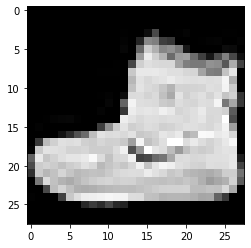

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print("ans:", trans[y_train[idx]])
plt.imshow(x_train[idx], cmap="gray")

In [57]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [59]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [60]:
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 2 不要進度條
model.fit(x_train_norm, 
     y_train,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[stop_callback, save_callback])

Epoch 1/50
270/270 - 1s - loss: 0.5947 - accuracy: 0.7999 - val_loss: 0.4694 - val_accuracy: 0.8387
Epoch 2/50
270/270 - 1s - loss: 0.4189 - accuracy: 0.8546 - val_loss: 0.4032 - val_accuracy: 0.8550
Epoch 3/50
270/270 - 1s - loss: 0.3795 - accuracy: 0.8679 - val_loss: 0.3653 - val_accuracy: 0.8732
Epoch 4/50
270/270 - 1s - loss: 0.3545 - accuracy: 0.8736 - val_loss: 0.3689 - val_accuracy: 0.8690
Epoch 5/50
270/270 - 1s - loss: 0.3351 - accuracy: 0.8805 - val_loss: 0.3482 - val_accuracy: 0.8770
Epoch 6/50
270/270 - 1s - loss: 0.3169 - accuracy: 0.8872 - val_loss: 0.3571 - val_accuracy: 0.8760
Epoch 7/50
270/270 - 1s - loss: 0.3037 - accuracy: 0.8904 - val_loss: 0.3523 - val_accuracy: 0.8742
Epoch 8/50
270/270 - 1s - loss: 0.2934 - accuracy: 0.8947 - val_loss: 0.3305 - val_accuracy: 0.8818
Epoch 9/50
270/270 - 1s - loss: 0.2847 - accuracy: 0.8977 - val_loss: 0.3303 - val_accuracy: 0.8775
Epoch 10/50
270/270 - 1s - loss: 0.2759 - accuracy: 0.9012 - val_loss: 0.3480 - val_accuracy: 0.8768

In [62]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8832


[0.3348342180252075, 0.8831999897956848]

In [63]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

array([9, 2, 1, ..., 8, 1, 5])

In [64]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
       index=["{}(真實)".format(i) for i in trans],
       columns=["{}(預測)".format(i) for i in trans])

,tshirt(預測),trouser(預測),pullover(預測),dress(預測),coat(預測),sandal(預測),shirt(預測),snaker(預測),bag(預測),ankle boot(預測)
tshirt(真實),814,0,27,42,9,1,97,0,10,0
trouser(真實),2,968,1,24,3,0,2,0,0,0
pullover(真實),11,0,831,18,91,0,47,0,2,0
dress(真實),14,6,11,909,38,0,17,0,5,0
coat(真實),0,1,119,22,813,0,41,0,4,0
sandal(真實),0,0,0,1,0,958,0,22,2,17
shirt(真實),111,1,100,43,74,0,666,0,5,0
snaker(真實),0,0,0,0,0,19,0,945,0,36
bag(真實),3,0,12,4,6,3,2,3,967,0
ankle boot(真實),0,0,0,1,0,13,1,24,0,961


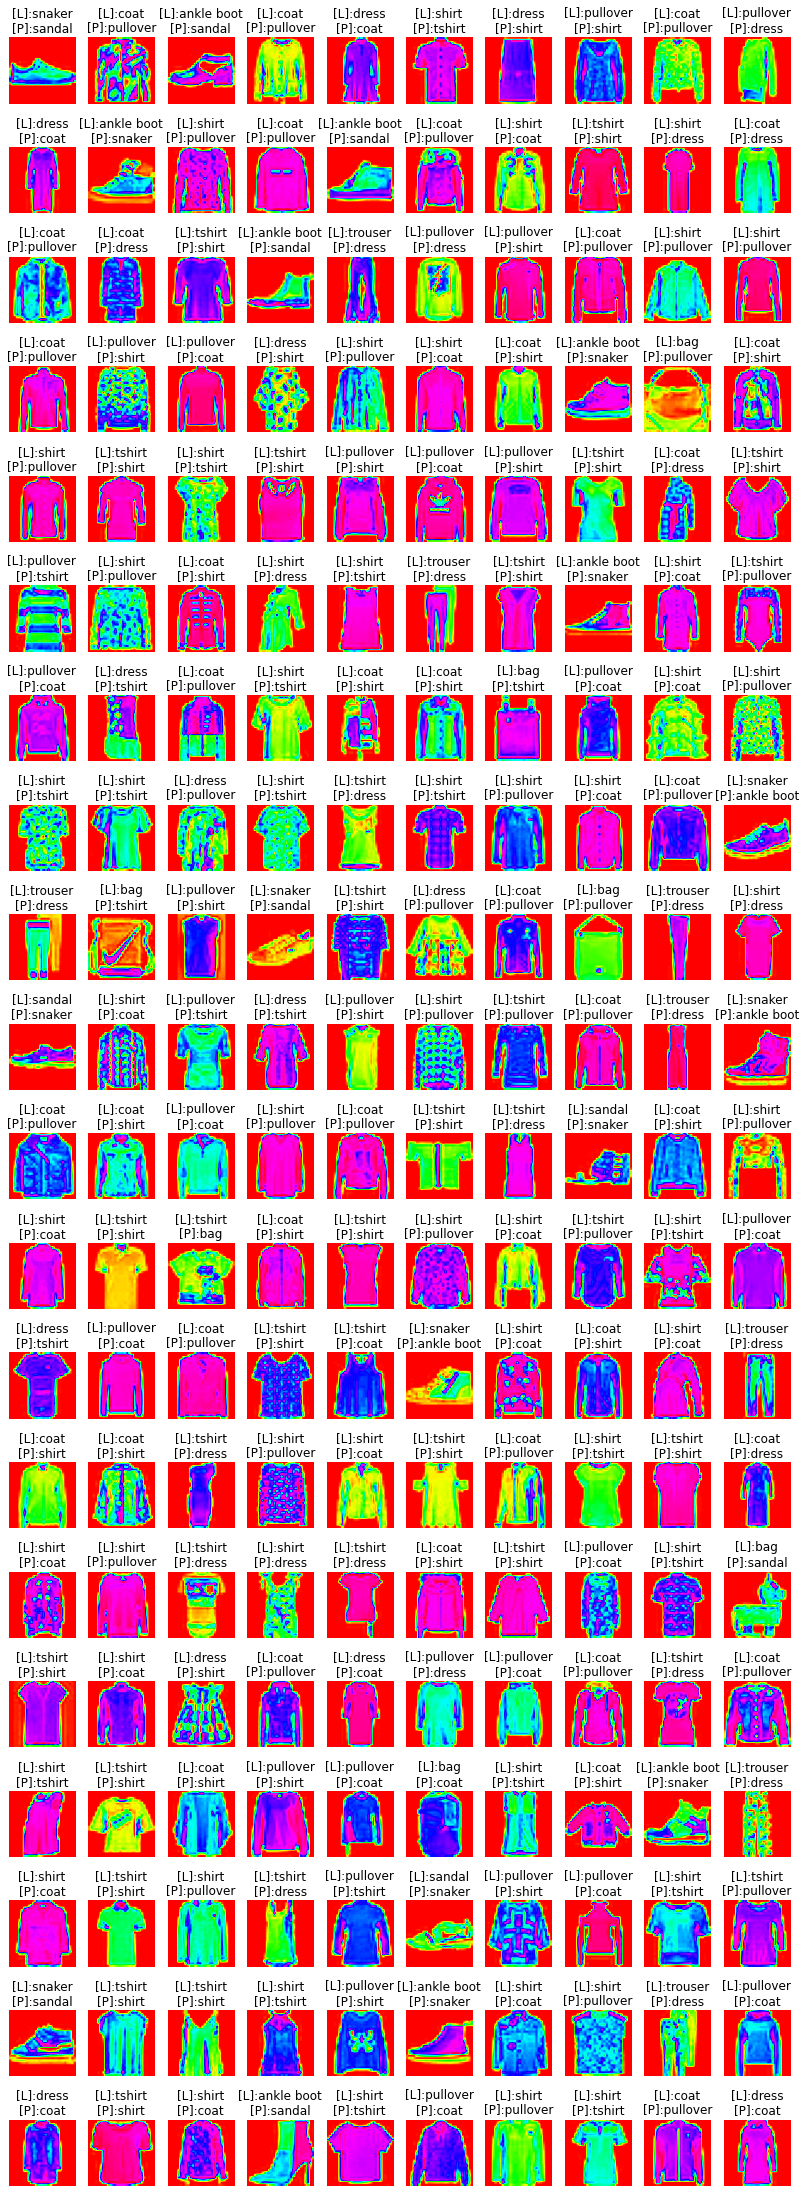

In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test)[0][:200]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], trans[y_test[d]], trans[pre[d]]
    t = "[L]:{}\n[P]:{}".format(label, p)
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="hsv")

檔名:2.jpg
tshirt 的機率: 0.0
trouser 的機率: 0.0
pullover 的機率: 0.01
dress 的機率: 0.0
coat 的機率: 0.0
sandal 的機率: 0.0
shirt 的機率: 0.0
snaker 的機率: 0.0
bag 的機率: 0.99
ankle boot 的機率: 0.0


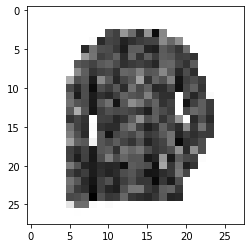

In [67]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(1, 784) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(trans[i], "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="gray")